## Imports

In [221]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Import seaborn
import seaborn as sns
# Apply the default theme
plt.style.use('ggplot')

## Functions



In [228]:
def startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title):
    # B0=1.5 # Tesla
    Hct=0.47 # from 0-1
    Hb=5.15 # mmol Hb tetramer/L plasma
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    #print(fwatere)
    r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
    r1=0.00025 #s-1/mmHg

    delta_R1voxeltotal_list=np.zeros(len(pO2_before_list))

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    for j in range(0,len(pO2_after_list)):
        for i in range(0,len(pO2_before_list)):
            #R1arterialbefore:
            pO2before=pO2_before_list[i] #mmHg
            Sbefore=((23400*((pO2before**3)+150*pO2before)**(-1)+1)**(-1))

            #R1arterialafter:
            pO2after=pO2_after_list[j] #mmHg
            Safter=((23400*((pO2after**3)+150*pO2after)**(-1)+1)**(-1))

            deltapO2=pO2after-pO2before
            #deltaR1plasma=R1plasmabefore-R1plasmaafter
            deltaR1plasma=r1*deltapO2

            deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
            #print('delta R1 blood total is '+str(deltaR1bloodtotal))

            deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*deltapO2
            delta_R1voxeltotal_list[i]=deltaR1_voxeltotal

        plt.plot(pO2_before_list,delta_R1voxeltotal_list,label=str(pO2after))

    colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    ax1.set_aspect(0.8/ax1.get_data_ratio(), adjustable='box')

    plt.title(str(title))
    plt.xlabel('Initial pO2 (mmHg)')
    plt.ylabel('$\Delta R1$ (s-1)')
    plt.legend(bbox_to_anchor=(1, 1))

def deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title):
    delta_R1voxeltotal_list=np.zeros((len(pO2_before_list),len(pO2_after_list)))
    deltapO2_list=np.zeros((len(pO2_before_list),len(pO2_after_list)))

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)

    for i in range(0,len(pO2_before_list)):
        for j in range(0,len(pO2_after_list)):
            #R1arterialbefore:
            pO2before=pO2_before_list[i] #mmHg
            Sbefore=((23400*((pO2before**3)+150*pO2before)**(-1)+1)**(-1))

            #R1arterialafter:
            pO2after=pO2_after_list[j] #mmHg
            Safter=((23400*((pO2after**3)+150*pO2after)**(-1)+1)**(-1))

            deltapO2=pO2after-pO2before
            deltapO2_list[i,j]=deltapO2
            #print(deltapO2_list)
            #deltaR1plasma=R1plasmabefore-R1plasmaafter
            deltaR1plasma=r1*deltapO2

            deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
            #print('delta R1 blood total is '+str(deltaR1bloodtotal))

            deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*deltapO2
            delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal

    for i in range(0,len(pO2_before_list)):
        plt.plot(deltapO2_list[i],delta_R1voxeltotal_list[i],label=pO2_before_list[i])

    #print(deltapO2_list)
    #print(delta_R1voxeltotal_list)

    colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
    for i,j in enumerate(ax2.lines):
        j.set_color(colors[i])
    ax2.set_aspect(0.8/ax2.get_data_ratio(), adjustable='box')

    plt.title(str(title))
    plt.xlabel('$\Delta$ pO2 (mmHg)')
    plt.ylabel('$\Delta R1$ (s-1)')
    plt.xlim(0,300)
    plt.legend(bbox_to_anchor=(1, 1))
    


## Necrotic Tissue
- Low blood volume (bloodvolume=0)
- pO2_before range is in the hypoxic range, so 2-40 mmHg
- pO2_after would increase from 40 upwards, 
- tissue doesn't consume O2 so no reason for delta pO2 to be negative

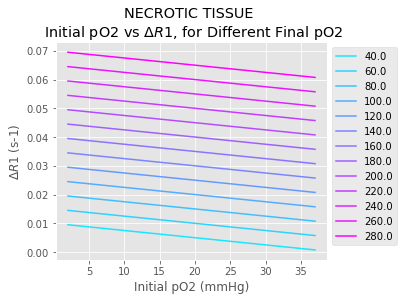

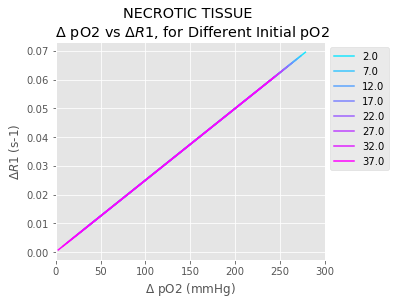

In [229]:
pO2_after_list=np.arange(40,300,20,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
bloodvolume=0

title='NECROTIC TISSUE \n Initial pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

title='NECROTIC TISSUE \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)

## Healthy Tissue 
- Blood volume = 0.05
- starting po2 is oxygenated (40-90)
- po2 after = 90+ 
- no reason for delta pO2 to be negative upon adding oxygen (metabolism shouldn't change)

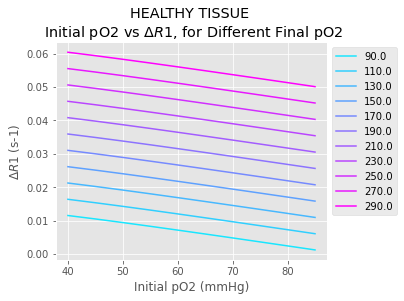

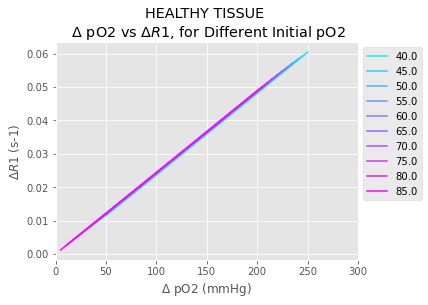

In [230]:
pO2_after_list=np.arange(90,300,20,dtype=float)
pO2_before_list=np.arange(40,90,5,dtype=float)
bloodvolume = 0.05

title='HEALTHY TISSUE \n Initial pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

title='HEALTHY TISSUE \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)


## Hypoxic Tissue (no O2 consumption change)
- blood volume = 0.05 
- starting po2 = 2-40 mmHg
- ending po2 = 40-500 mmHg
- no reason for delta pO2 to be negative upon adding oxygen (assumption: metabolism doesn't change)

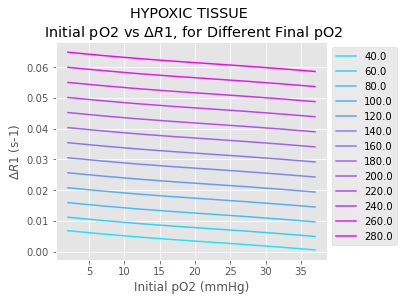

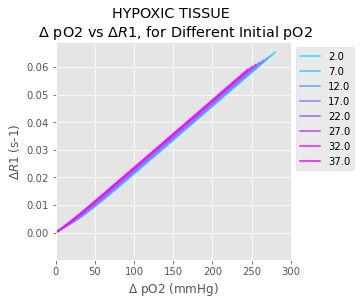

In [232]:
pO2_after_list=np.arange(40,300,20,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
bloodvolume = 0.05

title='HYPOXIC TISSUE \n Initial pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

pO2_after_list=np.arange(2,300,20,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
bloodvolume = 0.05
title='HYPOXIC TISSUE \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)


## Venous Blood
- blood volume=1
- starting pO2 = 30-60
- ending pO2 from 50-500 mmHg
- no reason for delta pO2 to be negative upon adding oxygen

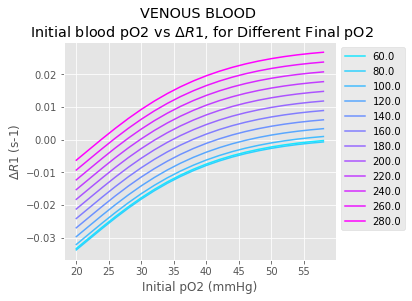

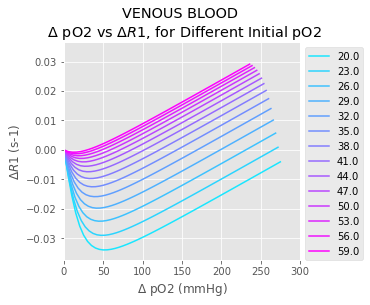

In [233]:
pO2_after_list=np.arange(60,300,20,dtype=float)
pO2_before_list=np.arange(20,60,2,dtype=float)

bloodvolume = 1
title='VENOUS BLOOD \n Initial blood pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

pO2_after_list=np.arange(20,300,5,dtype=float)
pO2_before_list=np.arange(20,60,3,dtype=float)

title='VENOUS BLOOD \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)


## Arterial Blood
- blood volume = 1
- starting pO2 80-90mmHg
- resulting pO2 90+ 
- no reason for delta pO2 to be negative upon adding oxygen

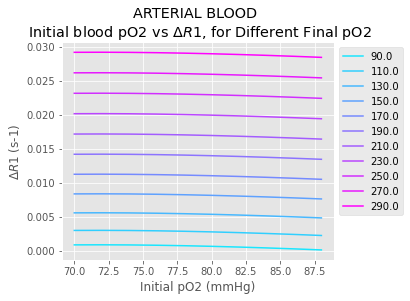

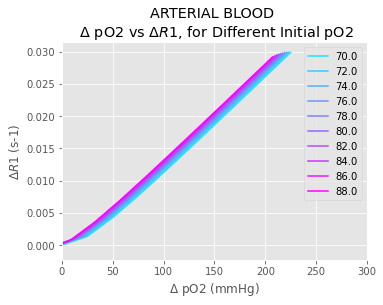

In [234]:
pO2_after_list=np.arange(90,300,20,dtype=float)
pO2_before_list=np.arange(70,90,2,dtype=float)

bloodvolume = 1
title='ARTERIAL BLOOD \n Initial blood pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1(pO2_after_list,pO2_before_list,bloodvolume,title)

pO2_after_list=np.arange(70,300,25,dtype=float)
pO2_before_list=np.arange(70,90,2,dtype=float)

title='ARTERIAL BLOOD \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale(pO2_after_list,pO2_before_list,bloodvolume,title)


## Hypoxic Tissue WITH O2 CONSUMPTION considered
- blood volume = 0.05 
- starting po2 = 2-40
- ending po2 = 2-300 
- o2 could be consumed by tissue, so delta po2 can be negative
- added 'consumption' factor - tissue pO2 no longer assumed to be = blood pO2. tpo2=bloodpO2*consumption
- for now, assume tissue consumes 90% of the O2 (exaggerated), consumption=0.1

In [271]:
def startingpo2_vs_deltaR1_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption):
    # B0=1.5 # Tesla
    Hct=0.47 # from 0-1
    Hb=5.15 # mmol Hb tetramer/L plasma
    fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    #print(fwatere)
    r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
    r1=0.00025 #s-1/mmHg

    delta_R1voxeltotal_list=np.zeros(len(pO2_before_list))

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    for j in range(0,len(pO2_after_list)):
        for i in range(0,len(pO2_before_list)):
            #R1arterialbefore:
            pO2before=pO2_before_list[i] #mmHg
            Sbefore=((23400*((pO2before**3)+150*pO2before)**(-1)+1)**(-1))

            #R1arterialafter:
            pO2after=pO2_after_list[j] #mmHg
            Safter=((23400*((pO2after**3)+150*pO2after)**(-1)+1)**(-1))

            deltapO2=pO2after-pO2before
            #deltaR1plasma=R1plasmabefore-R1plasmaafter
            deltaR1plasma=r1*deltapO2

            deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
            #print('delta R1 blood total is '+str(deltaR1bloodtotal))
            delta_tissuepO2=deltapO2*consumption
            deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*delta_tissuepO2
            delta_R1voxeltotal_list[i]=deltaR1_voxeltotal

        plt.plot(pO2_before_list,delta_R1voxeltotal_list,label=str(pO2after))
    #ax1.set_aspect(0.8/ax1.get_data_ratio(), adjustable='box')
    colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    plt.title(str(title))
    plt.xlabel('Initial pO2 (mmHg)')
    plt.ylabel('$\Delta R1$ (s-1)')
    plt.ylim(-0.01,0.06)
    plt.legend(bbox_to_anchor=(1, 1))
    

def deltapO2_vs_deltaR1_fullscale_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption):
    delta_R1voxeltotal_list=np.zeros((len(pO2_before_list),len(pO2_after_list)))
    deltapO2_list=np.zeros((len(pO2_before_list),len(pO2_after_list)))

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)

    for i in range(0,len(pO2_before_list)):
        for j in range(0,len(pO2_after_list)):
            #R1arterialbefore:
            pO2before=pO2_before_list[i] #mmHg
            Sbefore=((23400*((pO2before**3)+150*pO2before)**(-1)+1)**(-1))

            #R1arterialafter:
            pO2after=pO2_after_list[j] #mmHg
            Safter=((23400*((pO2after**3)+150*pO2after)**(-1)+1)**(-1))

            deltapO2=pO2after-pO2before
            deltapO2_list[i,j]=deltapO2
            #print(deltapO2_list)
            #deltaR1plasma=R1plasmabefore-R1plasmaafter
            deltaR1plasma=r1*deltapO2

            deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
            #print('delta R1 blood total is '+str(deltaR1bloodtotal))

            delta_tissuepO2=deltapO2*consumption
            #print(delta_tissuepO2)
            deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*delta_tissuepO2
            delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal

    for i in range(0,len(pO2_before_list)):
        plt.plot(deltapO2_list[i],delta_R1voxeltotal_list[i],label=pO2_before_list[i])
    #ax2.set_aspect(0.8/ax2.get_data_ratio(), adjustable='box')
    #print(deltapO2_list)
    #print(delta_R1voxeltotal_list)

    colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
    for i,j in enumerate(ax2.lines):
        j.set_color(colors[i])

    plt.title(str(title))
    plt.xlabel('$\Delta$ blood pO2 (mmHg)')
    plt.ylabel('$\Delta R1$ (s-1)')
    plt.ylim(-0.01,0.06)
    plt.xlim(0,300)
    plt.legend(bbox_to_anchor=(1, 1))


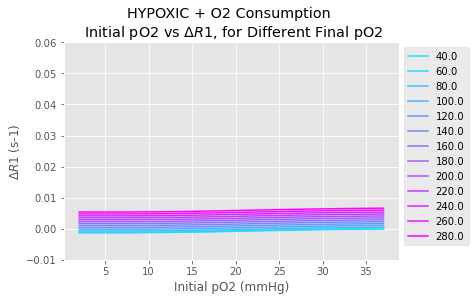

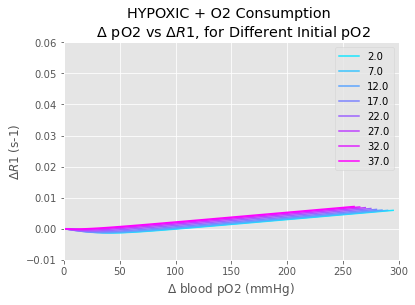

In [272]:
pO2_after_list=np.arange(40,300,20,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
bloodvolume = 0.05
consumption=0.1

title='HYPOXIC + O2 Consumption \n Initial pO2 vs $\Delta R1$, for Different Final pO2'
startingpo2_vs_deltaR1_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption)

pO2_after_list=np.arange(2,300,5,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
title='HYPOXIC + O2 Consumption \n $\Delta$ pO2 vs $\Delta R1$, for Different Initial pO2'
deltapO2_vs_deltaR1_fullscale_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption)


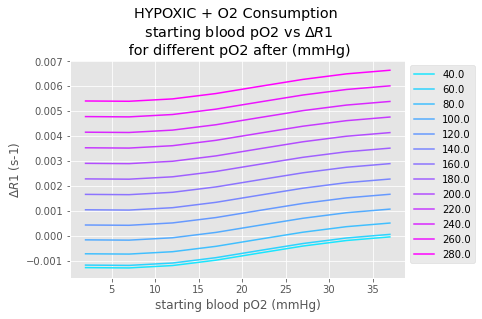

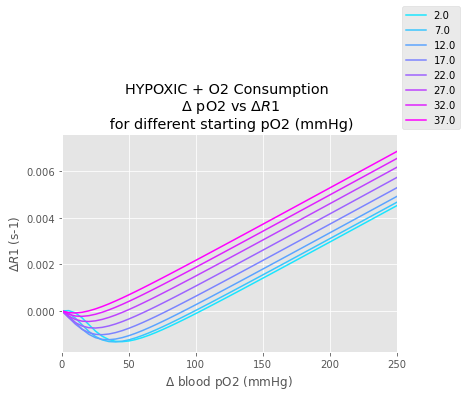

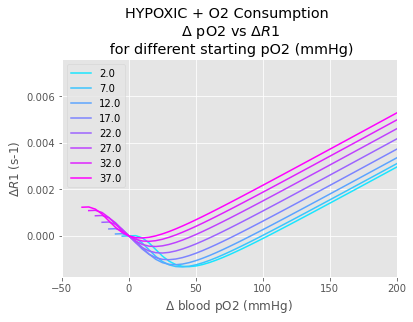

In [237]:
pO2_after_list=np.arange(40,300,20,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
bloodvolume = 0.05
consumption=0.1

title='HYPOXIC + O2 Consumption \n starting blood pO2 vs $\Delta R1$ \n for different pO2 after (mmHg)'
startingpo2_vs_deltaR1_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption)

pO2_after_list=np.arange(2,300,5,dtype=float)
pO2_before_list=np.arange(2,40,5,dtype=float)
title='HYPOXIC + O2 Consumption \n $\Delta$ pO2 vs $\Delta R1$ \n for different starting pO2 (mmHg)'
deltapO2_vs_deltaR1_fullscale_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption)

title='HYPOXIC + O2 Consumption \n $\Delta$ pO2 vs $\Delta R1$ \n for different starting pO2 (mmHg)'
deltapO2_vs_deltaR1_upto200_plus_consumption(pO2_after_list,pO2_before_list,bloodvolume,title,consumption)